In [11]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [16]:
df = pd.read_csv('diamonds.csv')

In [18]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    1
depth      0
table      0
price      0
x          1
y          0
z          0
dtype: int64

In [24]:
df = df[~df.isnull().any(axis=1)]


In [25]:
duplicated = df[df.duplicated()]
duplicated.size

1460

In [29]:
df = df.drop_duplicates()


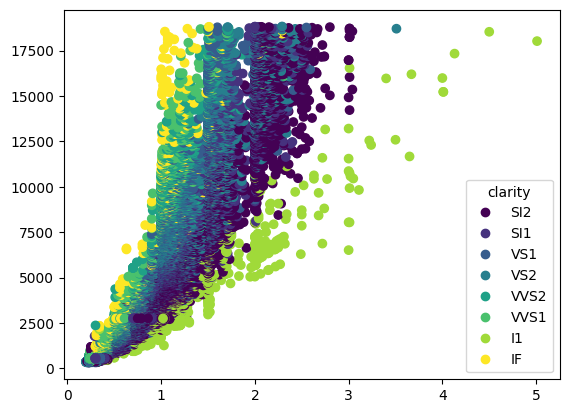

In [59]:
fig, first = plt.subplots()
scatter = first.scatter(x = df['carat'], y= df['price'], c=pd.factorize(df['clarity'])[0])
handles, labels = scatter.legend_elements()
legend = first.legend(handles, df['clarity'].unique(), title="clarity")

<Axes: >

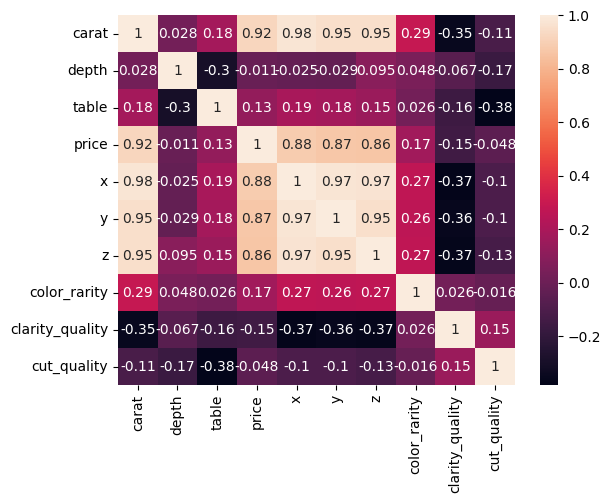

In [90]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [34]:
df['color'] = df['color'].map(lambda x: x.upper())
color = df['color'].unique()
color

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
color_to_rarity = {
    'D' : 1,
    'E' : 2,
    'F' : 3,
    'G' : 4,
    'H' : 5,
    'I' : 6,
    'J' : 7    
}
df['color_rarity'] = df['color'].map(color_to_rarity)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_rarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7


In [53]:
df['clarity'] = df['clarity'].map(lambda x: x.upper())
clarity = df['clarity'].unique()
clarity

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [52]:
df[df['clarity'] == '8']

,carat,cut,color,clarity,depth,table,price,x,y,z,color_rarity


In [51]:
df.drop(394, axis=0, inplace=True)

In [61]:
clarity_to_quality = {
    'I3' : 1,
    'I2' : 2, 
    'I1' : 3, 
    'SI2' : 4, 
    'SI1' : 5, 
    'VS2' : 6, 
    'VS1' : 7, 
    'VVS2' : 8, 
    'VVS1' : 9,
    'IF' : 10,
    'F' : 11 
}
df['clarity_quality'] = df['clarity'].map(clarity_to_quality)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_rarity,clarity_quality
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,7
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,4


In [88]:
ind = df[df['cut'] == 'very good'].index
df.loc[ind, 'cut'] = 'Very Good'
print(df['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [89]:
cut_quality = {"Ideal": 5, "Premium": 4, "Good": 3, "Very Good": 2, "Fair": 1}
df['cut_quality'] = df['cut'].map(cut_quality)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,color_rarity,clarity_quality,cut_quality
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,7,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6,6,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,4,3


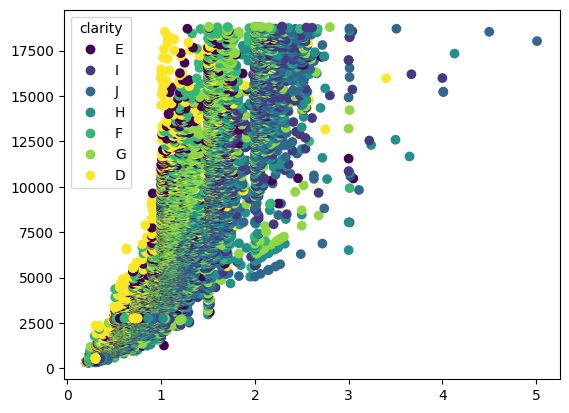

In [ ]:
fig, second = plt.subplots()
scatter = second.scatter(x = df['carat'], y= df['price'], c=pd.factorize(df['color'])[0])
handles, labels = scatter.legend_elements()
legend = second.legend(handles, df['color'].unique(), title="color")

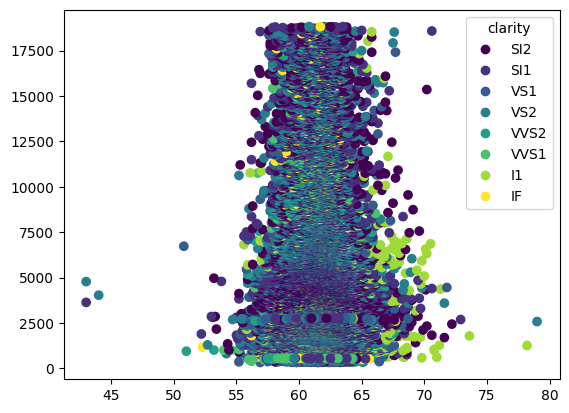

In [94]:
fig, third = plt.subplots()
scatter = third.scatter(x = df['depth'], y= df['price'], c=pd.factorize(df['clarity'])[0])
handles, labels = scatter.legend_elements()
legend = third.legend(handles, df['clarity'].unique(), title="clarity")

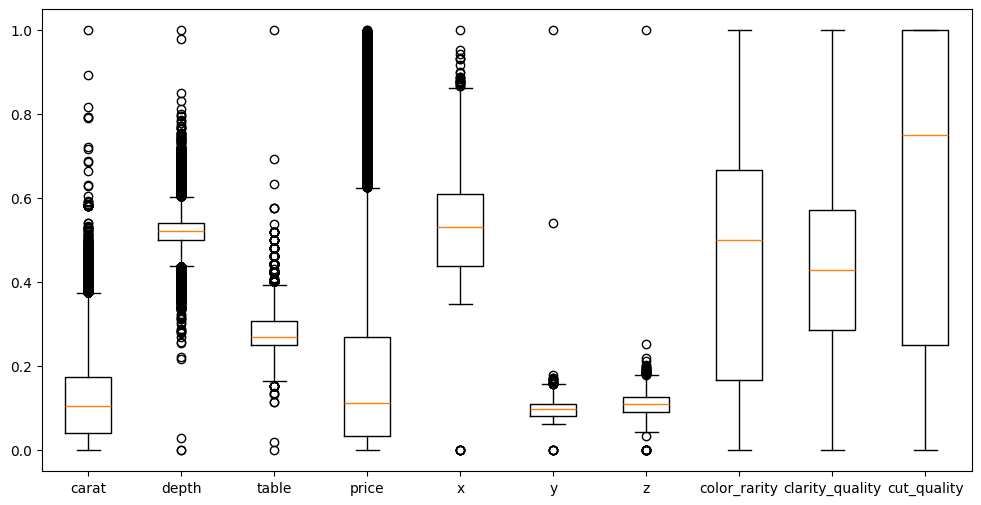

In [93]:
numeric = df.select_dtypes(include=np.number)
numeric = (numeric - numeric.min())/(numeric.max() - numeric.min())
plt.figure(figsize=(12, 6))
plt.boxplot(numeric.values, tick_labels =list(numeric.columns))
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

x = numeric.drop('price', axis=1)
y = numeric['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
krr = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
krr.fit(x_train, y_train)
y_pred = krr.predict(x_test)
mse = mean_squared_error(y_pred=y_pred, y_true= y_test)
print(mse)

: 